# 1. Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

# 2. Read the data as a data frame

In [2]:
insurance = pd.read_csv('insurance.csv')

# 3a. Shape of the data

In [3]:
print('shape =' , insurance.shape)
print('Total rows =' , insurance.shape[0])
print('Total columns =' , insurance.shape[1])

shape = (1338, 7)
Total rows = 1338
Total columns = 7


# 3b. Data type of each attribute

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1. age, children -> int
2. bmi, charges -> float
3. sex, smoker, region -> object

# 3c. Checking the presence of missing values

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset

# 3d. 5 point summary of numerical attributes

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Text(0.5, 1.0, 'Distribution of charges')

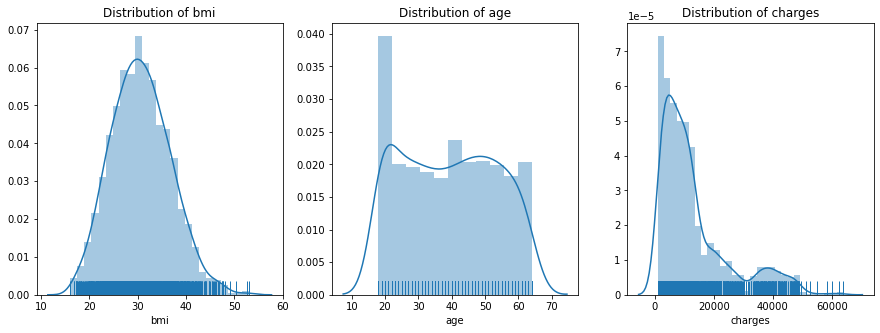

In [7]:
f, ax = plt.subplots(1, 3,figsize=(15, 5))
sns.distplot(insurance['bmi'],rug=True, ax=ax[0]).set_title('Distribution of bmi')
sns.distplot(insurance['age'],rug=True, ax=ax[1]).set_title('Distribution of age')
sns.distplot(insurance['charges'],rug=True, ax=ax[2]).set_title('Distribution of charges')

1. Bmi seems to have normal distribution
2. age has two difference peaks
3. similarly charges also have two different peaks and it is right skewed

# 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [8]:
skew = insurance[['bmi','age','charges']].skew(axis = 0, skipna = True).to_frame()
skew.columns = ['skewness']
skew

,skewness
bmi,0.284047
age,0.055673
charges,1.515880


charges seems to be right skewed from the value obtained

# 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

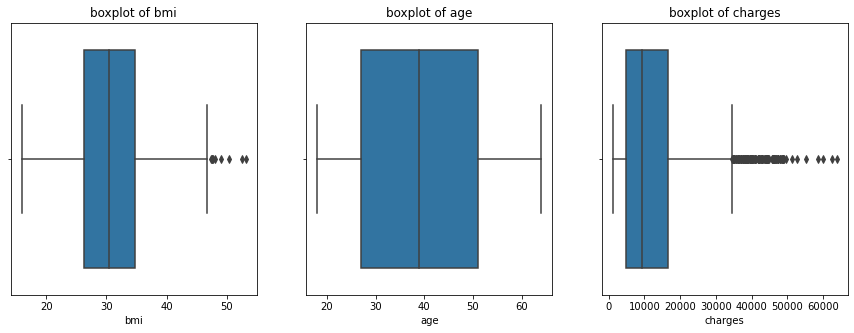

In [9]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(insurance['bmi'] , ax = ax[0]).set_title("boxplot of bmi")
sns.boxplot(insurance['age'] , ax = ax[1]).set_title("boxplot of age")
sns.boxplot(insurance['charges'] , ax = ax[2]).set_title("boxplot of charges");

In [10]:
print('Total bmi of Z score value above 3 is' , (stats.zscore(insurance['bmi']) > 3).sum())
print('Total age of Z score value above 3 is' , (stats.zscore(insurance['age']) > 3).sum())
print('Total charges of Z score value above 3 is' , (stats.zscore(insurance['charges']) > 3).sum())

Total bmi of Z score value above 3 is 4
Total age of Z score value above 3 is 0
Total charges of Z score value above 3 is 7


From box plot, we can say there are outliers in bmi and charges  
Also considering Z score, there are few outliers in bmi (4) and charges (7) above value 3

# 3h. Distribution of categorical columns (include children)

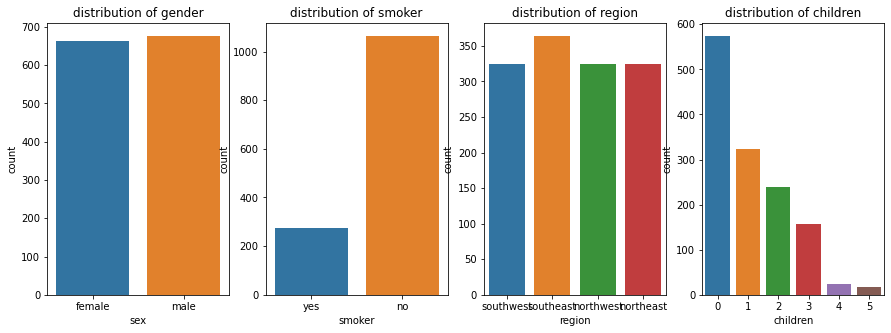

In [11]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
sns.countplot(insurance['sex'] , ax=ax[0]).set_title("distribution of gender")
sns.countplot(insurance['smoker'] , ax=ax[1]).set_title("distribution of smoker")
sns.countplot(insurance['region'] , ax=ax[2]).set_title("distribution of region")
sns.countplot(insurance['children'] , ax=ax[3]).set_title("distribution of children");

# 3i. Pair plot that includes all the columns of the data frame

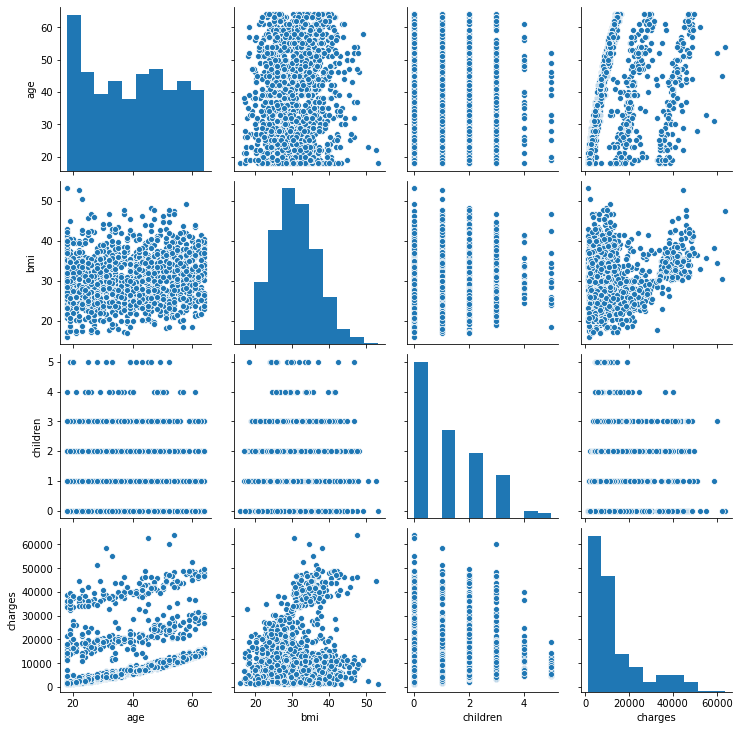

In [12]:
sns.pairplot(insurance);

# 4a. Do charges of people who smoke differ significantly from the people who don't?

h0 = charges does not differ significantly between smokers and non smoker    
h1 = charges differ significantly between smokers and non smoker    

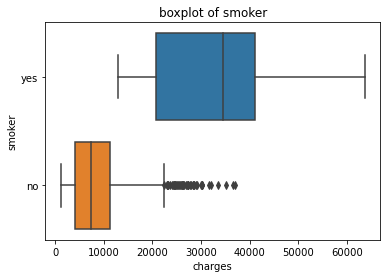

In [13]:
sns.boxplot(insurance['charges'], insurance['smoker']).set_title('boxplot of smoker');

In [14]:

alpha = 0.05

In [15]:
no_insurance = insurance[insurance['smoker'] == 'no']['charges']
yes_insurance = insurance[insurance['smoker'] == 'yes']['charges']

In [16]:
t, p = ttest_ind(no_insurance, yes_insurance)
print(t, p)

-46.664921172723716 8.271435842177219e-283


In [17]:
if p < alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

reject null hypothesis


since p pvalue is less than 0.05, we reject null hypothesis

# 4b. Does bmi of males differ significantly from that of females?

h0 = bmi does not differ significantly between male and female    
h1 = bmi differ significantly between male and female 

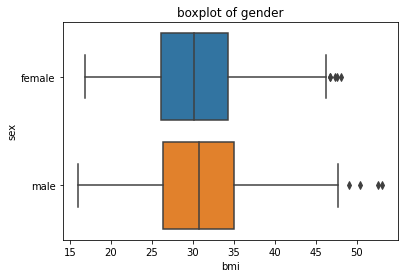

In [18]:
sns.boxplot(insurance['bmi'], insurance['sex']).set_title('boxplot of gender');

In [19]:
alpha = 0.05
male = insurance[insurance['sex'] == 'male']['bmi']
female = insurance[insurance['sex'] == 'female']['bmi']

In [20]:
t, p = ttest_ind(male,female)
print(t, p)

1.696752635752224 0.08997637178984934


In [21]:
if p < alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

fail to reject null hypothesis


since p > 0.05, fail to reject null hypothesis

# 4c. Is the proportion of smokers significantly different in different genders

h0 = Proportions are equal     
h1 = Proportions are not equal

In [22]:
alpha = 0.05
male_smoker = insurance[insurance['sex'] == 'male']['smoker'].value_counts()['yes']
female_smoker = insurance[insurance['sex'] == 'female']['smoker'].value_counts()['yes']

In [23]:
male = insurance['sex'].value_counts()['male']
female = insurance['sex'].value_counts()['female']

In [24]:
print('Male smokers =',male_smoker)
print('Female smokers =',female_smoker)
print('Total males =',male)
print('Total female =',female)

Male smokers = 159
Female smokers = 115
Total males = 676
Total female = 662


In [25]:

s,p = proportions_ztest([male_smoker,female_smoker],[male,female])
print('p =',p)
print('stat =',s)

p = 0.005324114164320532
stat = 2.7867402154855503


In [26]:
if p < alpha:
    print('The difference is significant and We reject the null Hypothesis')
else:
    print('The difference is not significant and We fail to reject the null Hypothesis')

The difference is significant and We reject the null Hypothesis


The difference is significant because p value is 0.0053 which is lesser than 0.05 and hence reject the null hypothesis

# 4d. Is the distribution of bmi across women with no children, one child and two children, the same?

h0 = distribution is same    
h1 = distribution is not same  

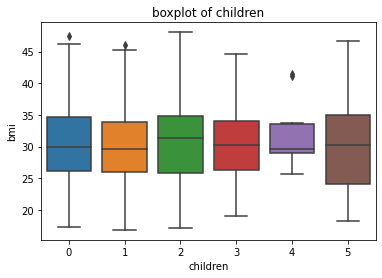

In [27]:
sns.boxplot(x = "children", y = "bmi", data = insurance[insurance['sex']=='female']).set_title('boxplot of children');

In [37]:
female_insurance = insurance[insurance['sex'] == 'female']

zero = female_insurance[female_insurance['children'] == 0][['bmi','age']]
one = female_insurance[female_insurance['children'] == 1][['bmi','age']]
two = female_insurance[female_insurance['children'] == 2][['bmi','age']]


f_stat, p_value = stats.f_oneway(zero,one,two)
print('f_stat =',f_stat)
print('P value =', p_value)

f_stat = [0.33447201 1.04384551]
P value = [0.71585799 0.35277849]


In [41]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
mod = ols('children ~ bmi', data = insurance).fit()
table = sm.stats.anova_lm(mod, typ=2)
print(table)

               sum_sq      df         F   PR(>F)
bmi          0.316291     1.0  0.217522  0.64101
Residual  1942.629150  1336.0       NaN      NaN


Since p value is > 0.05 , we fail to reject the null hypothesis

# Summary

There are a total of 1338 rows and 7 columns with 4 categorical and 3 continous columns. There are no missing values. charges columns seems to right skewed and there are few outliers present in bmi and charges columns. From pairplot we see that there is no obvious correlation between any continous variables. 

1. From hypothesis testing we find that charges differ significantly between smokers and non smokers. 
2. BMI seems to be same for both male and female, also distribution of bmi for females with different number of children is same. 
3. Proportions of smokers differ significantly between genders. 